In [1]:
import sys
sys.path.append('../')
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from funcs.analysis.analysis import *
%matplotlib inline

In [2]:
band = 'r'
wdir = '/disk1/hrb/python/'

In [13]:
def reader(n_subarray):
    return pd.read_csv(wdir+'data/merged/{}/{}_band/unclean/lc_{}.csv'.format(obj, band, n_subarray), nrows=None, index_col = ID, dtype = {'catalogue': np.uint8, 'mag_ps': np.float32, 'magerr': np.float32, 'mjd': np.float64, ID: np.uint32})


In [14]:
# obj = 'calibStars'
# ID  = 'uid_s'
obj = 'qsos'
ID = 'uid'
dr = analysis(ID, obj)
dr.read_in(reader, redshift=False)
dr.df['mjd_floor'] = np.floor(dr.df['mjd']).astype('int')

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [16]:
dr.df

,mjd,mag,magerr,catalogue,mjd_floor
uid,,,,,
1,54741.371761,22.071905,0.115390,5,54741
1,55806.591422,21.599611,0.170113,7,55806
1,55806.601990,21.565922,0.188556,7,55806
1,56247.317129,21.771994,0.166527,7,56247
1,56247.328310,21.752575,0.186741,7,56247
...,...,...,...,...,...
526356,58464.266007,20.563707,0.139099,11,58464
526356,58636.423935,20.454365,0.130105,11,58636
526356,58641.476701,20.485062,0.132971,11,58641


### How many repeat observations per night

In [29]:
dr.summary()
sdss = dr.df[dr.df['catalogue']==5].reset_index()
frac = sdss.duplicated(subset=['uid','mjd_floor'], keep='first').sum()/len(sdss)
print('Number of SDSS observations within the same night of the same object: {:.2f}%'.format(frac*100))
ps = dr.df[dr.df['catalogue']==7].reset_index()
frac = ps.duplicated(subset=['uid','mjd_floor'], keep='first').sum()/len(ps)
print('Number of PS   observations within the same night of the same object: {:.2f}%'.format(frac*100))
ztf = dr.df[dr.df['catalogue']==11].reset_index()
frac = ztf.duplicated(subset=['uid','mjd_floor'], keep='first').sum()/len(ztf)
print('Number of ZTF  observations within the same night of the same object: {:.2f}%'.format(frac*100))

frac = dr.df.reset_index().duplicated(subset=['uid','mjd_floor'], keep='first').sum()/len(dr.df)
print('Total observations within the same night of the same object: {:.2f}%'.format(frac*100))

Number of SDSS observations within the same night of the same object: 2.16%
Number of PS   observations within the same night of the same object: 51.25%
Number of ZTF  observations within the same night of the same object: 36.58%
Total observations within the same night of the same object: 37.74%


In [43]:
dr.summary() # gives us dr.n_qsos
frac = len(dr.df[dr.df.reset_index().duplicated(subset=['uid','mjd_floor'], keep='first').values].index.unique())/dr.n_qsos
print('Fraction of objects that have another observation within the same night: {:.2f}%'.format(frac*100))

Number of qsos with lightcurve: 524,198
Number of datapoints in:
SDSS: 1,428,502
PS: 6,222,789
ZTF: 28,582,883
Fraction of objects that have another observation within the same night: 96.79%


In [30]:
grouped = pd.read_csv(wdir+'data/merged/{}/{}_band/grouped_stats_{}_all.csv'.format(obj,band,band), index_col=ID)

In [31]:
grouped

,n_tot,n_sss_r1,n_sss_r2,n_sdss,n_ps,n_ztf,mjd_min,mjd_max,mjd_ptp,mag_min,mag_max,mag_mean,mag_med,mag_opt_mean,mag_opt_mean_flux,mag_std,magerr_max,magerr_mean,magerr_med,magerr_opt_std
uid,,,,,,,,,,,,,,,,,,,,
1,20,0,0,1,2,17,54741.371761,58475.144699,3733.772938,20.648458,22.071905,21.314349,21.280437,21.391485,21.569781,0.303328,0.206130,0.169525,0.174606,0.036470
2,15,0,0,1,6,8,54747.352476,58487.101042,3739.748566,20.885572,21.628172,21.222124,21.338759,21.153275,21.196141,0.211375,0.218896,0.137845,0.168371,0.023076
3,28,0,0,1,4,23,52170.284887,58487.100579,6316.815692,20.204323,20.987711,20.747161,20.783174,20.839113,20.865847,0.171582,0.190376,0.143654,0.165816,0.018146
4,42,0,0,1,8,33,54764.193704,58655.441829,3891.248124,19.624706,20.046188,19.829424,19.854283,19.730980,19.741959,0.109456,0.108703,0.081237,0.095557,0.007432
5,41,0,0,1,8,32,53271.313403,58657.436319,5386.122916,20.416544,21.183098,20.805577,20.872179,20.861860,20.891596,0.184846,0.184414,0.137326,0.154009,0.015900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526352,26,0,0,2,6,18,52909.369624,58486.100787,5576.731163,20.730858,21.882521,21.257484,21.303963,21.367025,21.438924,0.247556,0.211098,0.165825,0.181719,0.024806
526353,62,0,0,3,5,54,52909.353868,58657.434954,5748.081086,19.774813,20.334967,19.996472,19.990250,20.012676,20.045792,0.115852,0.110659,0.083103,0.091315,0.007625
526354,48,0,0,1,10,37,54741.213069,58655.441829,3914.228759,18.583073,19.193748,18.993602,19.022628,18.965803,19.005658,0.136132,0.068640,0.049646,0.058919,0.003991


In [ ]:
dr.df

In [48]:
# Remove objects which are fainter than the limiting magnitude of the survey (or we dould do magerr=0.198)
catalogue = dr.df['catalogue']
# mag_med = grouped['mag_med']
# mag_med = mag_med[mag_med.index.isin(catalogue.index)]
# mask = ((catalogue == 5) & (mag_med < 22.7)) | ((catalogue == 7) & (mag_med < 23.2)) | ((catalogue == 11) & (mag_med < 20.6))

magerr_med = grouped['magerr_med']
magerr_med = magerr_med[magerr_med.index.isin(catalogue.index)]
mask = (catalogue > 1) & (magerr_med > 0.198)



In [49]:
mask

uid
1         False
1         False
1         False
1         False
1         False
          ...  
423090    False
423090    False
423090    False
423090    False
423090    False
Length: 39997, dtype: bool

In [50]:
dr.df

,mjd,mag,magerr,catalogue,mjd_floor
uid,,,,,
1,54741.371761,22.071905,0.115390,5,54741
1,55806.591422,21.599611,0.170113,7,55806
1,55806.601990,21.565922,0.188556,7,55806
1,56247.317129,21.771994,0.166527,7,56247
1,56247.328310,21.752575,0.186741,7,56247
...,...,...,...,...,...
423090,58246.259456,20.313356,0.151155,11,58246
423090,58246.266563,20.480021,0.168549,11,58246
423090,58246.267546,20.346546,0.152951,11,58246


count    2981.000000
mean        0.211755
std         0.070315
min         0.024026
25%         0.178678
50%         0.224300
75%         0.255814
max         0.417925
Name: magerr, dtype: float64

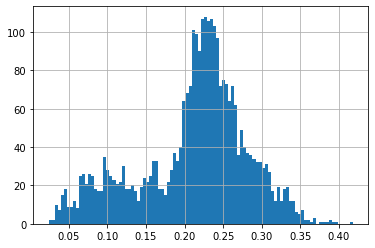

In [51]:
dr.df[mask]['magerr'].hist(bins=100)
dr.df[mask]['magerr'].describe()

count    37016.000000
mean         0.110153
std          0.055702
min          0.006949
25%          0.064557
50%          0.104348
75%          0.153747
max          0.439337
Name: magerr, dtype: float64

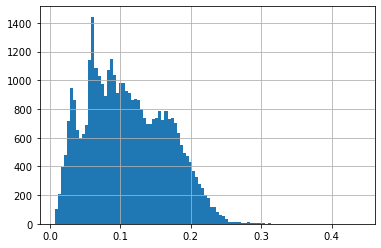

In [52]:
dr.df[~mask]['magerr'].hist(bins=100)
dr.df[~mask]['magerr'].describe()

count    32833.000000
mean         0.099191
std          0.050038
min          0.006949
25%          0.060857
50%          0.093673
75%          0.132593
max          0.439337
Name: magerr, dtype: float64

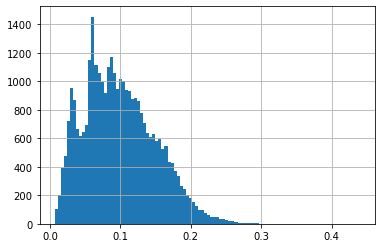

In [37]:
dr.df[mask]['magerr'].hist(bins=100)
dr.df[mask]['magerr'].describe()

count    7164.000000
mean        0.202670
std         0.042409
min         0.078521
25%         0.173082
50%         0.196813
75%         0.224841
max         0.417925
Name: magerr, dtype: float64

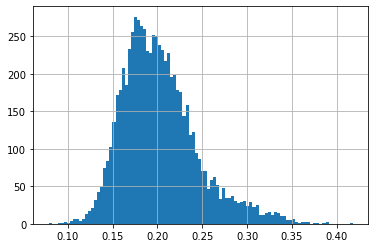

In [38]:
dr.df[~mask]['magerr'].hist(bins=100)
dr.df[~mask]['magerr'].describe()

,n_tot,n_sss_r1,n_sss_r2,n_sdss,n_ps,n_ztf,mjd_min,mjd_max,mjd_ptp,mag_min,mag_max,mag_mean,mag_med,mag_opt_mean,mag_opt_mean_flux,mag_std,magerr_max,magerr_mean,magerr_med,magerr_opt_std
uid,,,,,,,,,,,,,,,,,,,,
1,20,0,0,1,2,17,54741.371761,58475.144699,3733.772938,20.648458,22.071905,21.314349,21.280437,21.391485,21.569781,0.303328,0.206130,0.169525,0.174606,0.036470
2,15,0,0,1,6,8,54747.352476,58487.101042,3739.748566,20.885572,21.628172,21.222124,21.338759,21.153275,21.196141,0.211375,0.218896,0.137845,0.168371,0.023076
3,28,0,0,1,4,23,52170.284887,58487.100579,6316.815692,20.204323,20.987711,20.747161,20.783174,20.839113,20.865847,0.171582,0.190376,0.143654,0.165816,0.018146
4,42,0,0,1,8,33,54764.193704,58655.441829,3891.248124,19.624706,20.046188,19.829424,19.854283,19.730980,19.741959,0.109456,0.108703,0.081237,0.095557,0.007432
5,41,0,0,1,8,32,53271.313403,58657.436319,5386.122916,20.416544,21.183098,20.805577,20.872179,20.861860,20.891596,0.184846,0.184414,0.137326,0.154009,0.015900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526352,26,0,0,2,6,18,52909.369624,58486.100787,5576.731163,20.730858,21.882521,21.257484,21.303963,21.367025,21.438924,0.247556,0.211098,0.165825,0.181719,0.024806
526353,62,0,0,3,5,54,52909.353868,58657.434954,5748.081086,19.774813,20.334967,19.996472,19.990250,20.012676,20.045792,0.115852,0.110659,0.083103,0.091315,0.007625
526354,48,0,0,1,10,37,54741.213069,58655.441829,3914.228759,18.583073,19.193748,18.993602,19.022628,18.965803,19.005658,0.136132,0.068640,0.049646,0.058919,0.003991


In [15]:
(grouped['mag_med']<22.7) &  (dr.df['catalogue']==5)

uid
1          True
1         False
1         False
1         False
1         False
          ...  
526352    False
526353    False
526354    False
526355    False
526356    False
Length: 563235, dtype: bool

In [6]:
# # WRITE
# grouped_q = pd.read_csv('../data/merged/{}/{}_band/grouped_stats_{}.csv'.format('qsos',band,band), index_col='uid')
# bins=np.linspace(16,21,51)
# counts, _ = np.histogram(grouped_q['mag_mean'], bins=bins)
# uid_s_list = []
# for i in range(len(counts)):
#     uid_s_list.append(np.random.choice(grouped[(bins[i] < grouped['mag_mean']) & (grouped['mag_mean'] < bins[i+1])].index, size=counts[i], replace=False))
# # uid_s_list = np.concatenate(uid_s_list)
# np.savetxt('/disk1/hrb/python/data/merged/calibStars/r_band/uid_s_matched.csv', uid_s_list, fmt='%i')

In [24]:
# READ
if obj == 'calibStars':
    uid_s_matched_sub = np.loadtxt('/disk1/hrb/python/data/merged/calibStars/r_band/uid_s_matched.csv', dtype='int')
    uid_s_matched = np.append(grouped[grouped['mag_mean']>21].index, uid_s_matched_sub)
    grouped = grouped.loc[uid_s_matched]
    dr.df = dr.df[dr.df.index.isin(uid_s_matched)]

In [8]:
dr.df

,mjd,mag,magerr,catalogue,mjd_floor
uid,,,,,
1,54741.371761,22.071905,0.115390,5,54741
1,55806.591422,21.599611,0.170113,7,55806
1,55806.601990,21.565922,0.188556,7,55806
1,56247.317129,21.771994,0.166527,7,56247
1,56247.328310,21.752575,0.186741,7,56247
...,...,...,...,...,...
526356,58464.266007,20.563707,0.139099,11,58464
526356,58636.423935,20.454365,0.130105,11,58636
526356,58641.476701,20.485062,0.132971,11,58641


In [8]:
del uid_s_matched, uid_s_matched_sub

NameError: name 'uid_s_matched' is not defined

NameError: name 'grouped_q' is not defined

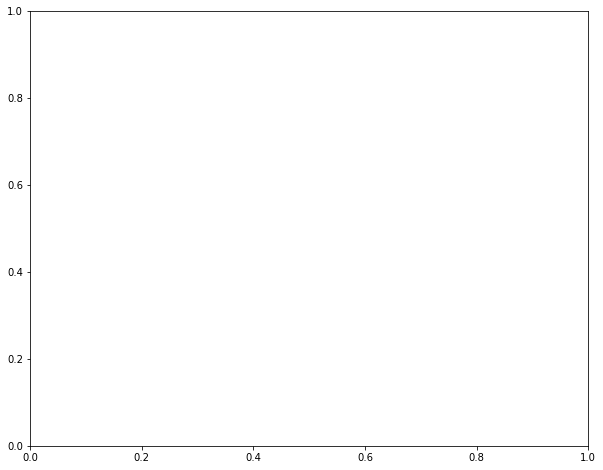

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
grouped_q['mag_mean'].hist(bins=51, ax=ax, label='qsos', alpha=0.5, range=(16,23))
# grouped2['mag_mean'].hist(bins=51, ax=ax, label='stars', alpha=0.5, range=(16,23))
grouped['mag_mean'].hist(bins=51, ax=ax, label='stars', alpha=0.5, range=(16,23))
ax.legend()

fig, ax = plt.subplots(1,1, figsize=(10,8))
grouped_q['mag_std'].hist(bins=51, ax=ax, label='qsos', alpha=0.5, range=(0,0.6))
# grouped2['mag_std'].hist(bins=51, ax=ax, label='stars', alpha=0.5, range=(0,0.6))
grouped['mag_std'].hist(bins=51, ax=ax, label='stars', alpha=0.5, range=(0,0.6))
ax.legend()

### Averaging nightly observations

> We want to combine multiple observations on the same night into a single datapoint, while throwing out bad points
> histograms below show that it is safe to round mjd down to the nearest integer and then bin them (since the distribution doesnt carry over from 1 back to 0

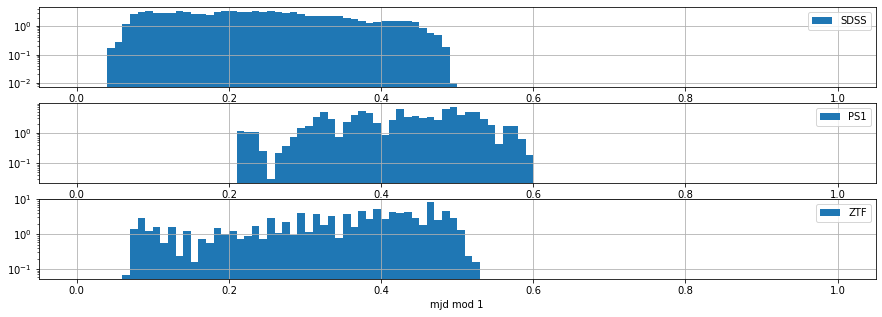

In [33]:
fig, axes = plt.subplots(3,1, figsize=(15,5))
for cat, ax in zip([1,2,3],axes.ravel()):
    (dr.df[dr.df['catalogue']==cat]['mjd'] % 1).hist(bins=100, range=(0,1), ax=ax, alpha=1, density=True, label=dr.survey_dict[cat])
    ax.legend()
    ax.set(xlabel='mjd mod 1', yscale='log')

In [6]:
def average_nightly_obs(group):
    n = len(group)
    cat, mjd, mag, magerr = group[['catalogue','mjd','mag','magerr']].values.T
#     assert len(np.unique(cat))==1, group.index.unique()
    cat = cat[0]
    
    if (n==2) & (np.ptp(mag)>0.4): # why 0.4? maybe better to use np.sum(error)
        # If we have two observations on the same night and the difference is greater than 0.4 mag
        uid = group.index[0]
        median = grouped.loc[uid,['mag_med']].values
        idx = np.argmin(abs(mag-median))
        mag_mean = mag[idx] # throw away bad point (one that is furthest from median of lc)
        mjd_mean = mjd[idx]
        magerr_mean = magerr[idx]
        
    else:
        if n>2:
            uid = group.index[0]
            median_lc = grouped.loc[uid,['mag_med']].values
            mask = (abs(mag-(np.median(mag)+median_lc)/2) < 1)
            if mask.sum()==0:
                mag_mean = np.nan
                err_msg = 'error with uid: '+str(uid)+'. Couldnt not average mags at mjd(s): '+str(mjd)
                print(err_msg)
                log.append(err_msg)
                
#         mag_mean  = -2.5*np.log10(np.mean(10**(-(mag-8.9)/2.5))) + 8.9
            else:
                mag = mag[mask] # remove points that are 1mag away from the median of the group
                magerr = magerr[mask]
                mjd = mjd[mask]
            
        mjd_mean  = np.mean(mjd)
        magerr_mean = (magerr ** -2).sum() ** -0.5 # sum errors in quadrature
        mag_mean  = -2.5*np.log10(np.average(10**(-(mag-8.9)/2.5), weights = magerr**-2)) + 8.9
        
    return {'catalogue':cat,'mjd':mjd_mean, 'mag':mag_mean, 'magerr':magerr_mean}

In [6]:
mask = dr.df.reset_index()[[ID,'mjd_floor']].duplicated(keep=False).values
single_obs = dr.df[~mask].drop(columns='mjd_floor')  # observations that do not share the same night with any other observations
# multi_obs = dr.df[mask] # observations that have at least one other observation that night. We need to groupby these then add them back onto df above. then sort_values([ID,'mjd'])
# log = []
# del dr.df

In [8]:
# multiprocesssor
chunks = np.array_split(multi_obs.index, 4)
uids = [(chunk[0],int(chunk[-1]-1)) for chunk in chunks] # need to check we arent making gaps with the -1
chunks = [multi_obs.loc[uids[i][0]:uids[i][1]] for i in range(4)]
del dr.df
del multi_obs

In [9]:
# For multiprocessing
def multiobs_groupby(chunk):
    
    def average_nightly_obs(group):
        n = len(group)
        cat, mjd, mag, magerr = group[['catalogue','mjd','mag','magerr']].values.T
    #     assert len(np.unique(cat))==1, group.index.unique()
        cat = cat[0]

        if (n==2) & (np.ptp(mag)>0.4):
            uid = group.index[0]
            median = grouped.loc[uid,['mag_med']].values
            idx = np.argmin(abs(mag-median))
            mag_mean = mag[idx] # throw away bad point (one that is furthest from median of lc)
            mjd_mean = mjd[idx]
            magerr_mean = magerr[idx]

        else:
            if n>2:
                uid = group.index[0]
                median_lc = grouped.loc[uid,['mag_med']].values
                mask = (abs(mag-(np.median(mag)+median_lc)/2) < 1)
                if mask.sum()==0:
                    mag_mean = np.nan
                    err_msg = 'error with uid: '+str(uid)+'. Couldnt not average mags at mjd(s): '+str(mjd)
                    print(err_msg)
                    log.append(err_msg)

    #         mag_mean  = -2.5*np.log10(np.mean(10**(-(mag-8.9)/2.5))) + 8.9
                else:
                    mag = mag[mask] # remove points that are 1mag away from the median of the group
                    magerr = magerr[mask]
                    mjd = mjd[mask]

            mjd_mean  = np.mean(mjd)
            magerr_mean = (magerr ** -2).sum() ** -0.5 # sum errors in quadrature
            mag_mean  = -2.5*np.log10(np.average(10**(-(mag-8.9)/2.5), weights = magerr**-2)) + 8.9

        return {'catalogue':cat,'mjd':mjd_mean, 'mag':mag_mean, 'magerr':magerr_mean}
    
    return chunk.groupby([ID,'mjd_floor']).apply(average_nightly_obs).apply(pd.Series).reset_index('mjd_floor', drop=True).astype({'catalogue':'int'})

if __name__ == '__main__':
    pool = Pool(4)
    result = pd.concat(pool.map(multiobs_groupby, chunks))
    
result.to_csv('averaged_qsos')

error with uid: 288882. Couldnt not average mags at mjd(s): [58231.1819676 58231.1837963 58231.3172222]
error with uid: 58690. Couldnt not average mags at mjd(s): [55096.5860751 55096.5860751 55096.5944934 55096.5944934]
error with uid: 63384. Couldnt not average mags at mjd(s): [56971.3140247 56971.3269431 56971.3396036 56971.3525554]
error with uid: 78672. Couldnt not average mags at mjd(s): [55482.4130278 55482.4137252 55482.4242797 55482.4249482]
error with uid: 106852. Couldnt not average mags at mjd(s): [55587.3214175 55587.3220196 55587.3337081]
error with uid: 329416. Couldnt not average mags at mjd(s): [56736.4313476 56736.4421719 56736.4532917 56736.4646313]
error with uid: 344830. Couldnt not average mags at mjd(s): [56783.4143422 56783.4267329 56783.438969 ]
error with uid: 506606. Couldnt not average mags at mjd(s): [55086.523881  55086.5257562 55086.5332617]
error with uid: 264300. Couldnt not average mags at mjd(s): [57036.5857856 57036.5978563 57036.6102029]


In [ ]:
#For single core
from time import time
start = time()
avgd  = multi_obs.groupby([ID,'mjd_floor']).apply(average_nightly_obs).apply(pd.Series).reset_index('mjd_floor', drop=True).astype({'catalogue':'int'})
end   = time()
print('elapsed: {:.2f}'.format(end-start))

np.savetxt('/disk1/hrb/python/data/merged/{}/{}_band/log.txt'.format(obj,band),np.array(log), fmt='%s')

avgd.to_csv('averaged_qsos.csv') # save intermediate step if having memory issues

In [11]:
avgd = pd.read_csv('averaged_qsos.csv',index_col=ID)

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
avgd

,catalogue,mjd,mag,magerr
uid,,,,
1,7,55806.596706,21.584365,0.126307
1,7,56247.322720,21.763349,0.124287
2,7,55452.487291,21.089470,0.045087
2,7,55478.311104,21.130826,0.068084
2,7,55803.562248,21.230106,0.087720
...,...,...,...,...
526355,7,55834.344053,20.030781,0.033878
526355,7,56247.323931,20.375487,0.045295
526355,7,56550.528003,20.185057,0.033152


In [13]:
dr.df = single_obs.append(avgd).sort_values([ID,'mjd'])
# x = x[x['catalogue']==2]

In [15]:
dr.df.index = dr.df.index.astype('int')

In [16]:
dr.df

,mjd,mag,magerr,catalogue
uid,,,,
1,54741.371761,22.071905,0.115390,5
1,55806.596706,21.584365,0.126307,7
1,56247.322720,21.763349,0.124287,7
1,58292.479294,21.206030,0.173635,11
1,58313.420544,21.208019,0.173756,11
...,...,...,...,...
526356,58464.266007,20.563707,0.139099,11
526356,58636.423935,20.454365,0.130105,11
526356,58641.476701,20.485062,0.132971,11


### remove outliers

In [17]:
fig, ax = dr.plot_series(uids, survey=2, filtercodes='r', markersize=0.5)
x2 = x[x['catalogue']==2]
# x2 = x
for uid, axis in zip(uids, ax):
    mjd, mag, magerr = x2.loc[uid,['mjd','mag','magerr']].values.T
    axis.errorbar(mjd, mag, yerr = magerr, lw = 0.5, markersize = 10)
#     axis.set(xlim=[58200,58300])
fig.savefig('averaging_nightly_observations_ztf.pdf', bbox_inches='tight') # test our data cleaning is working

NameError: name 'uids' is not defined

In [17]:
dr.df = dr.df.join(grouped[['mag_med','mag_std']], on=ID)
dr.df['Z'] = (dr.df['mag']-dr.df['mag_med'])/dr.df['mag_std']

In [18]:
def remove_outliers(group):
    dmjd1, dmag1 = group[['mjd','mag']].diff(-1).fillna(0).values.T
    dmjd2, dmag2 = group[['mjd','mag']].diff(+1).fillna(0).values.T
    clean = group[~(((abs(dmag1)>0.6) & (abs(dmag2)>0.6)) & ((abs(dmjd1)<500) | (abs(dmjd2)<500)))]
    return clean

In [19]:
from time import time
start = time()
clean_phot = dr.df[['catalogue','mjd','mag','magerr']].groupby(ID).apply(remove_outliers).reset_index(level=1, drop=True)
end   = time()
print('elapsed: {:.2f}s'.format(end-start))

elapsed: 1643.38s


In [ ]:
# # testing outlier detection
# fig, ax = dr.plot_series(uids, survey=3, filtercodes='r')
# for i, axis in enumerate(ax):
#     group = dr.df.loc[uids[i]]
#     dmjd1, dmag1 = group[['mjd','mag']].diff(-1).fillna(0).values.T
#     dmjd2, dmag2 = group[['mjd','mag']].diff(+1).fillna(0).values.T
#     n_remove = (((abs(dmag1)>0.6) & (abs(dmag2)>0.6)) & ((abs(dmjd1)<500) | (abs(dmjd2)<500))).sum()
#     axis.text(0.02, 0.72, 'n_remove: {:d}'.format(n_remove), transform=axis.transAxes, fontsize=10)
#     axis.text(0.02, 0.80, 'Z: {:.2f}'.format(sample['Z'].values[i]), transform=axis.transAxes, fontsize=10)

### save processed data

#### def save(args):
    i, chunk = args
    f = open('/disk1/hrb/python/data/merged/{}/{}_band/lc_{}.csv'.format(obj,band,i), 'w')
    comment = '# CSV of cleaned photometry.\n# Data has been averaged nightly and outliers have been removed\n'
    f.write(comment)
    chunk.to_csv(f)

In [21]:
# multiprocesssor
chunks = np.array_split(clean_phot,4)
if __name__ == '__main__':
    pool = Pool(4)
    pool.map(save, enumerate(chunks))

In [ ]:
# single processor
# for i, chunk in enumerate(np.array_split(clean_phot,4)):
#     f = open('/disk1/hrb/python/data/merged/qsos/{}_band/lc_{}.csv'.format(band,i), 'a')
#     comment = '# CSV of cleaned photometry.\n# Data has been averaged nightly and outliers have been removed'
#     f.write(comment)
#     chunk.to_csv(f)